<a href="https://colab.research.google.com/github/elanozturk/python/blob/main/Ders_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet #Kahin

In [10]:
df = pd.read_csv("dam.csv")
df.head(3)

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [11]:
df.columns = ["Tarih","Doluluk Oranı","Su Miktarı"]
df.head(3)

,Tarih,Doluluk Oranı,Su Miktarı
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [12]:
df["Kapasite"] = df["Su Miktarı"] / df["Doluluk Oranı"] *100

In [13]:
df.head(3)

,Tarih,Doluluk Oranı,Su Miktarı,Kapasite
0,2005-01-01,44.62,388,869.565217
1,2005-01-02,44.62,388,869.565217
2,2005-01-03,44.47,386,868.000899


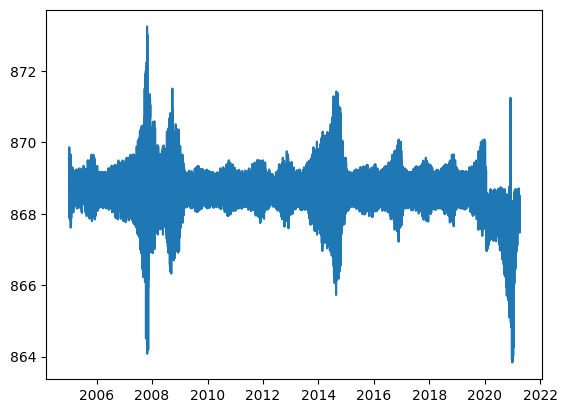

In [19]:
plt.plot(df["Tarih"],df["Kapasite"])
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tarih          5941 non-null   object 
 1   Doluluk Oranı  5941 non-null   float64
 2   Su Miktarı     5941 non-null   int64  
 3   Kapasite       5941 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 185.8+ KB


In [18]:
df["Tarih"] = pd.to_datetime(df["Tarih"])

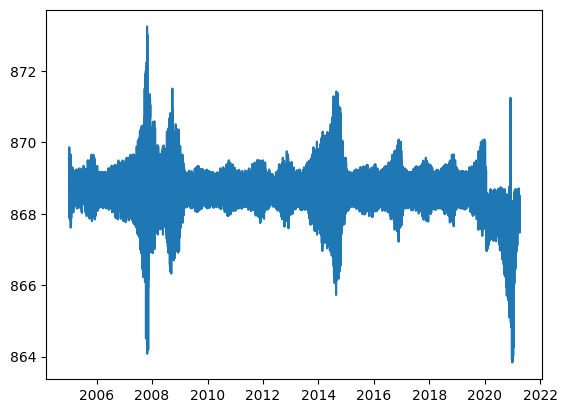

In [21]:
plt.plot(df["Tarih"],df["Kapasite"])
plt.show()

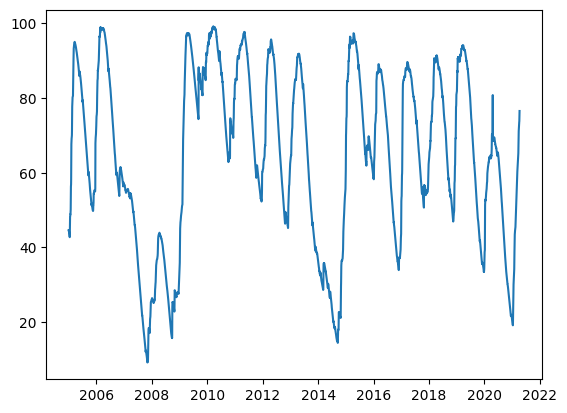

In [22]:
plt.plot(df["Tarih"],df["Doluluk Oranı"])
plt.show()

In [24]:
veri = df[["Tarih","Doluluk Oranı"]]
veri.head(3)

,Tarih,Doluluk Oranı
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47


In [25]:
veri.columns = ["ds","y"] #sSütun adlarını böyle istiyor kütüphane
veri.head(3)

,ds,y
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47


In [37]:
model = Prophet()
model.fit(veri)
future = model.make_future_dataframe(1000)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/7a3eu9pc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/pfrqaaq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82943', 'data', 'file=/tmp/tmp5jomphg7/7a3eu9pc.json', 'init=/tmp/tmp5jomphg7/pfrqaaq9.json', 'output', 'file=/tmp/tmp5jomphg7/prophet_modelvdrspm00/prophet_model-20240206170951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,64.496341,47.778349,64.743521,64.496341,64.496341,-8.076824,-8.076824,-8.076824,0.007630,0.007630,0.007630,-8.084454,-8.084454,-8.084454,0.0,0.0,0.0,56.419518
1,2005-01-02,64.536205,47.999998,64.969721,64.536205,64.536205,-7.688423,-7.688423,-7.688423,0.009052,0.009052,0.009052,-7.697475,-7.697475,-7.697475,0.0,0.0,0.0,56.847782
2,2005-01-03,64.576068,48.469721,65.551580,64.576068,64.576068,-7.303243,-7.303243,-7.303243,0.000324,0.000324,0.000324,-7.303567,-7.303567,-7.303567,0.0,0.0,0.0,57.272825
3,2005-01-04,64.615931,49.822200,66.863689,64.615931,64.615931,-6.897967,-6.897967,-6.897967,0.005245,0.005245,0.005245,-6.903212,-6.903212,-6.903212,0.0,0.0,0.0,57.717964
4,2005-01-05,64.655795,49.398001,66.349460,64.655795,64.655795,-6.483304,-6.483304,-6.483304,0.013717,0.013717,0.013717,-6.497021,-6.497021,-6.497021,0.0,0.0,0.0,58.172491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,2023-12-29,15.667688,-110.549133,145.100799,-102.100096,155.491138,-9.475652,-9.475652,-9.475652,-0.006252,-0.006252,-0.006252,-9.469400,-9.469400,-9.469400,0.0,0.0,0.0,6.192037
6935,2023-12-30,15.638516,-108.255042,147.195864,-102.241177,155.673543,-9.102871,-9.102871,-9.102871,0.007630,0.007630,0.007630,-9.110501,-9.110501,-9.110501,0.0,0.0,0.0,6.535645
6936,2023-12-31,15.609343,-108.890330,145.134201,-102.382257,155.835317,-8.734953,-8.734953,-8.734953,0.009052,0.009052,0.009052,-8.744006,-8.744006,-8.744006,0.0,0.0,0.0,6.874390
6937,2024-01-01,15.580171,-112.906682,147.737272,-102.523338,155.997091,-8.369599,-8.369599,-8.369599,0.000324,0.000324,0.000324,-8.369923,-8.369923,-8.369923,0.0,0.0,0.0,7.210572


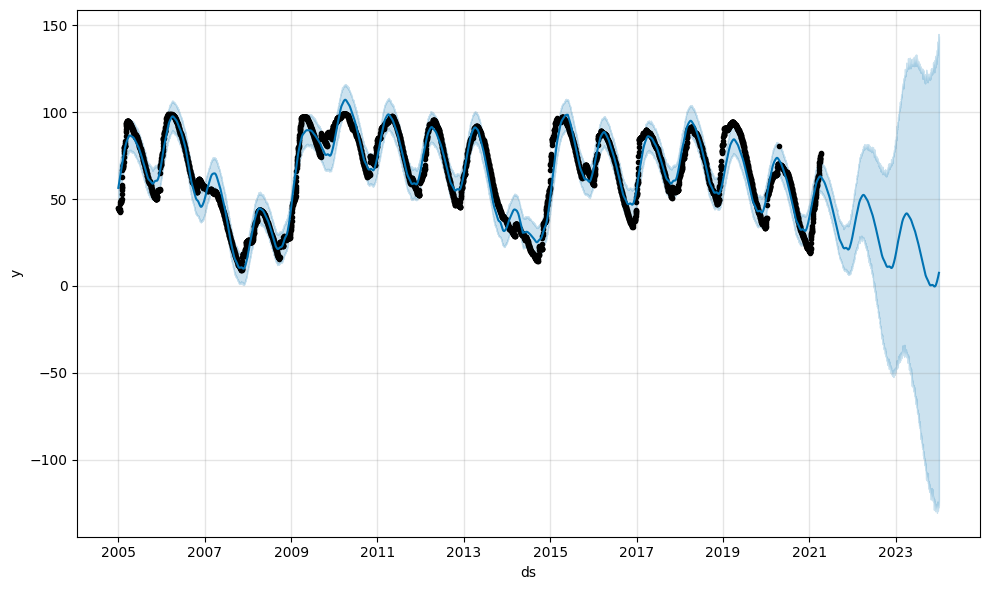

In [39]:
Tahmin = model.predict(future)
model.plot(Tahmin);

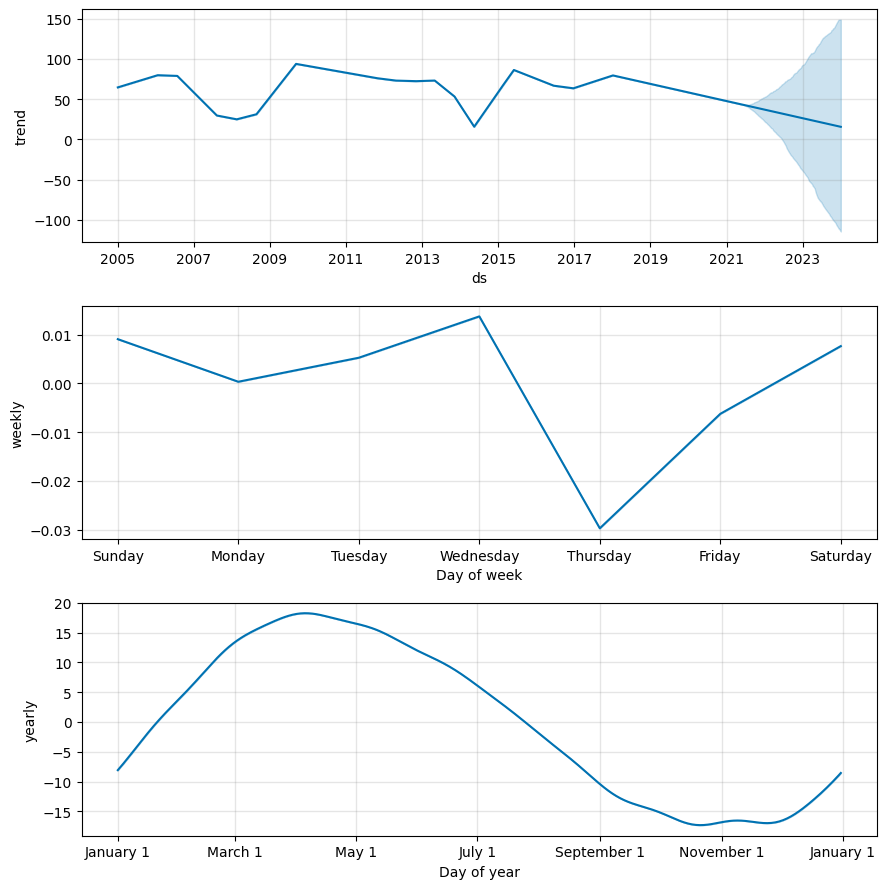

In [40]:
model.plot_components(Tahmin);

In [41]:
!pip install yfinance

In [42]:
import yfinance as yf
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [44]:
yf.download("TSLA","2005-01-01","2024-02-06")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-01-30,195.330002,196.360001,190.610001,191.589996,191.589996,109982300
2024-01-31,187.000000,193.970001,185.850006,187.289993,187.289993,103221400
2024-02-01,188.500000,189.880005,184.279999,188.860001,188.860001,91843300


In [52]:
df = yf.download("TSLA","2020-01-01","2024-02-06")
df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000


In [72]:
df = df.reset_index()
df.head(3)

,index,Date,Open,High,Low,Close,Adj Close,Volume,ons_tl,gram_tl
0,0,2015-01-02,1184.000000,1194.500000,1169.500000,1186.000000,1186.000000,138,2764.542354,88.892037
1,1,2015-01-05,1180.300049,1206.900024,1180.099976,1203.900024,1203.900024,470,2819.822908,90.669547
2,2,2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049,1219.300049,97,2841.883575,91.378893


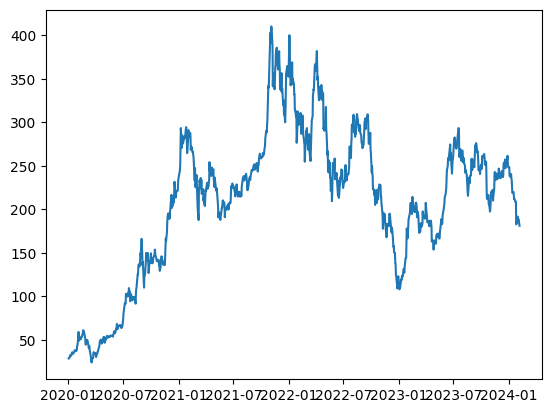

In [54]:
plt.plot(df["Date"],df["Close"])

In [55]:
gelecek = df[["Date","Close"]]
gelecek.head(3)

,Date,Close
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/xmllid9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/scxktu1s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11962', 'data', 'file=/tmp/tmp5jomphg7/xmllid9q.json', 'init=/tmp/tmp5jomphg7/scxktu1s.json', 'output', 'file=/tmp/tmp5jomphg7/prophet_modeld9ardu8u/prophet_model-20240206173335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


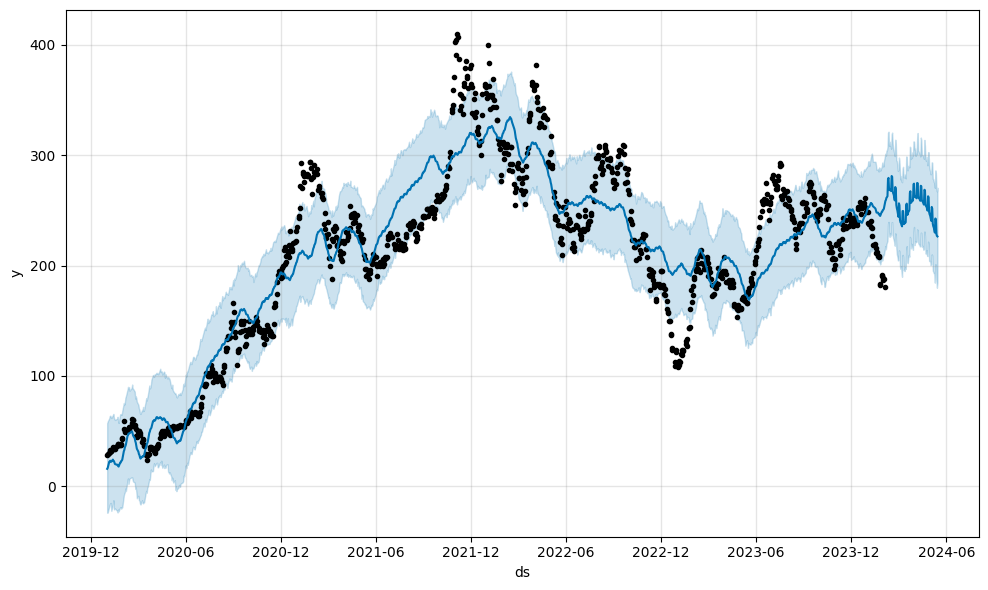

In [56]:
gelecek.columns = ["ds","y"]
model = Prophet()
model.fit(gelecek)
future = model.make_future_dataframe(100)
Tahmin = model.predict(future)
model.plot(Tahmin);

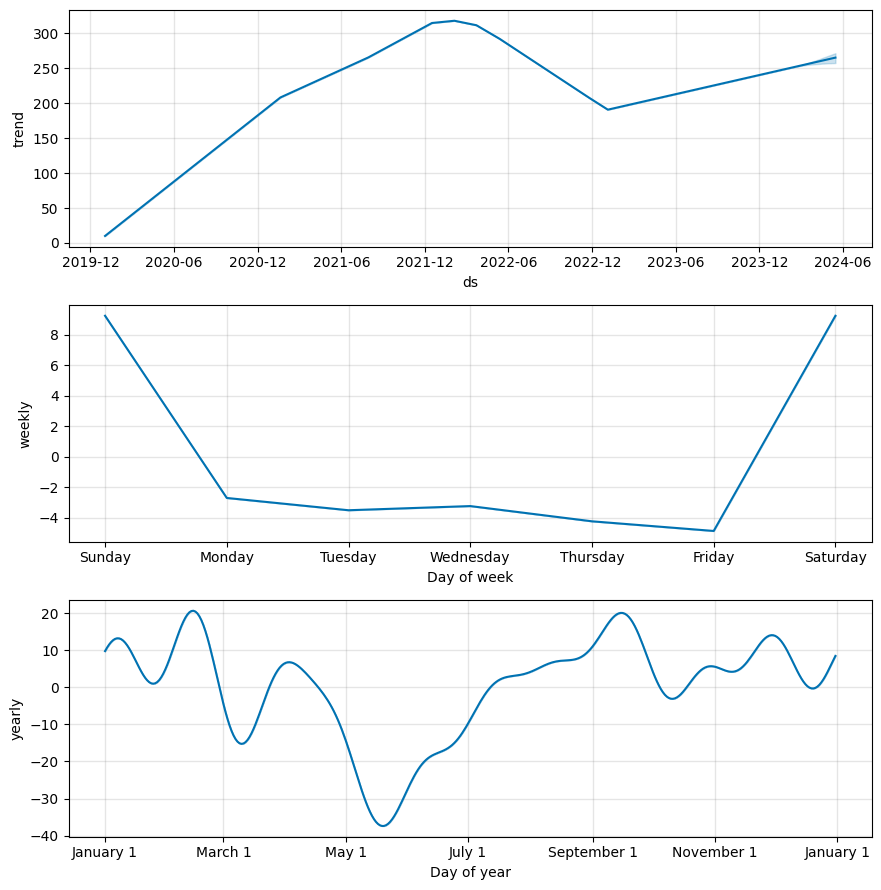

In [57]:
model.plot_components(Tahmin);

In [58]:
df = yf.download("GC=F","2015-01-01","2024-02-06")
df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,1184.000000,1194.500000,1169.500000,1186.000000,1186.000000,138
2015-01-05,1180.300049,1206.900024,1180.099976,1203.900024,1203.900024,470
2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049,1219.300049,97


In [ ]:
# 1 ONS 31.10 GR

In [59]:
dolar = yf.download("TRY=X","2015-01-01","2024-02-06")
dolar.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,2.33116,2.33116,2.33116,2.33116,2.33116,0
2015-01-02,2.33098,2.35700,2.33055,2.33098,2.33098,0
2015-01-05,2.34224,2.35173,2.32770,2.34224,2.34224,0


In [61]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,1184.0,1194.5,1169.5,1186.0,1186.0,138


In [62]:
dolar.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,2.33116,2.33116,2.33116,2.33116,2.33116,0


In [67]:
df["ons_tl"] = df["Close"] *dolar["Close"]
df.head(3)


,Open,High,Low,Close,Adj Close,Volume,ons_tl
Date,,,,,,,
2015-01-02,1184.000000,1194.500000,1169.500000,1186.000000,1186.000000,138,2764.542354
2015-01-05,1180.300049,1206.900024,1180.099976,1203.900024,1203.900024,470,2819.822908
2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049,1219.300049,97,2841.883575


In [70]:
df["gram_tl"] = df["ons_tl"] /31.10
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,ons_tl,gram_tl
Date,,,,,,,,
2024-02-01,2040.199951,2064.500000,2029.000000,2053.000000,2053.000000,947,62328.670095,2004.137302
2024-02-02,2054.800049,2055.899902,2027.699951,2036.099976,2036.099976,888,61984.993172,1993.086597
2024-02-05,2038.900024,2040.800049,2013.800049,2025.699951,2025.699951,888,61380.573150,1973.651870


In [73]:
df = df.reset_index()
df.head(3)

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,ons_tl,gram_tl
0,0,0,2015-01-02,1184.000000,1194.500000,1169.500000,1186.000000,1186.000000,138,2764.542354,88.892037
1,1,1,2015-01-05,1180.300049,1206.900024,1180.099976,1203.900024,1203.900024,470,2819.822908,90.669547
2,2,2,2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049,1219.300049,97,2841.883575,91.378893


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/8p9u6qcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/gesc2t37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75080', 'data', 'file=/tmp/tmp5jomphg7/8p9u6qcq.json', 'init=/tmp/tmp5jomphg7/gesc2t37.json', 'output', 'file=/tmp/tmp5jomphg7/prophet_model222h04br/prophet_model-20240206180635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


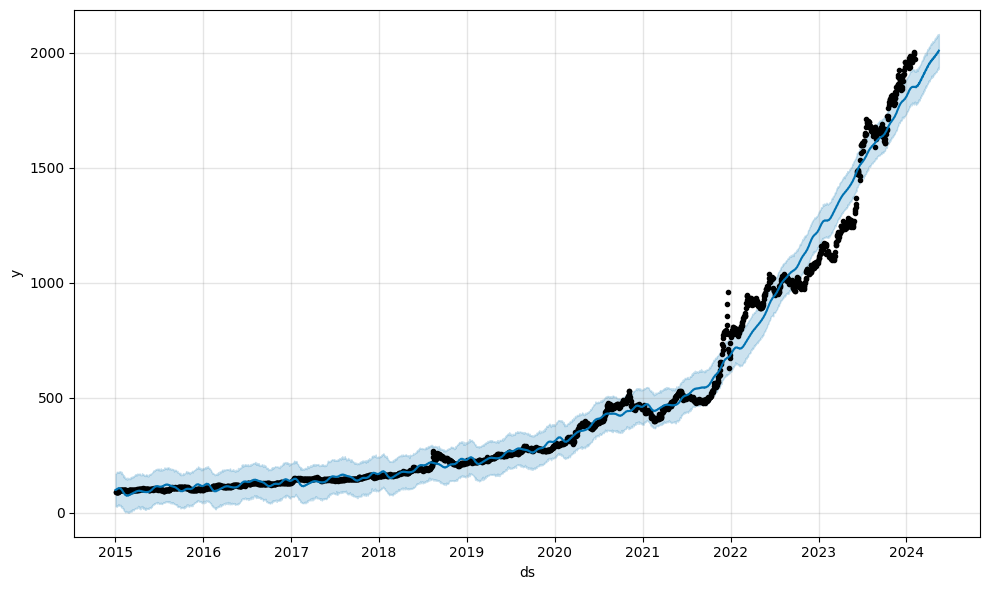

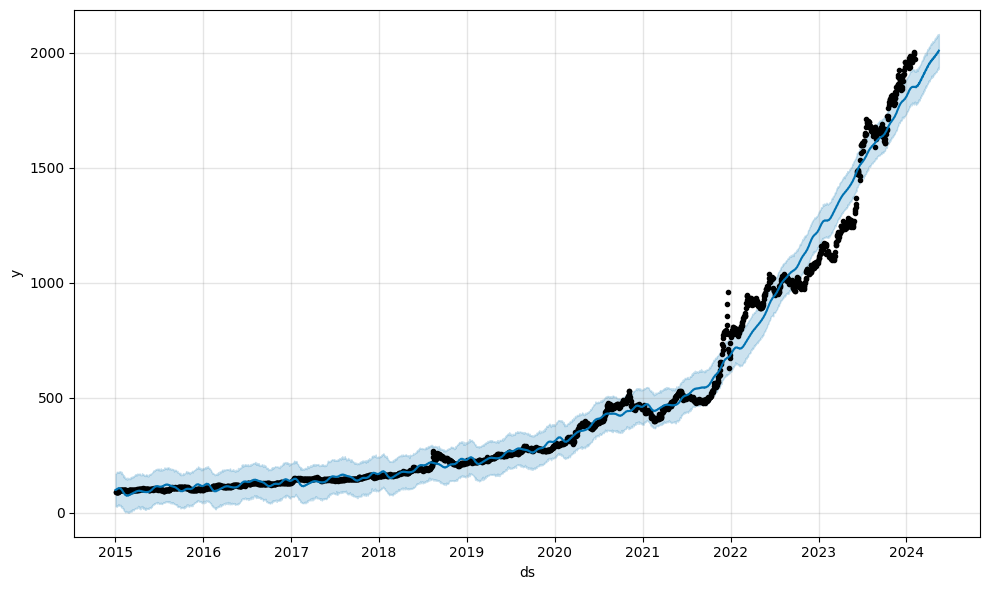

In [75]:
gelecek = df[["Date","gram_tl"]]
gelecek.columns = ["ds","y"]
model = Prophet()
model.fit(gelecek)
fut = model.make_future_dataframe(100)
tahmin = model.predict(fut)
model.plot(tahmin)

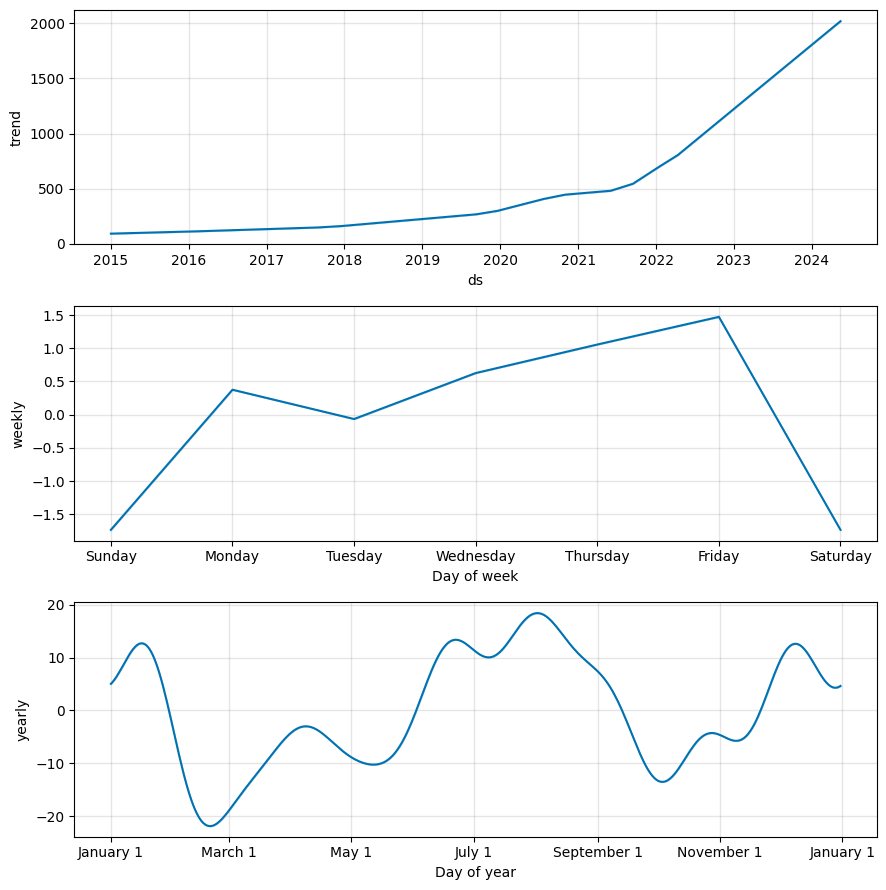

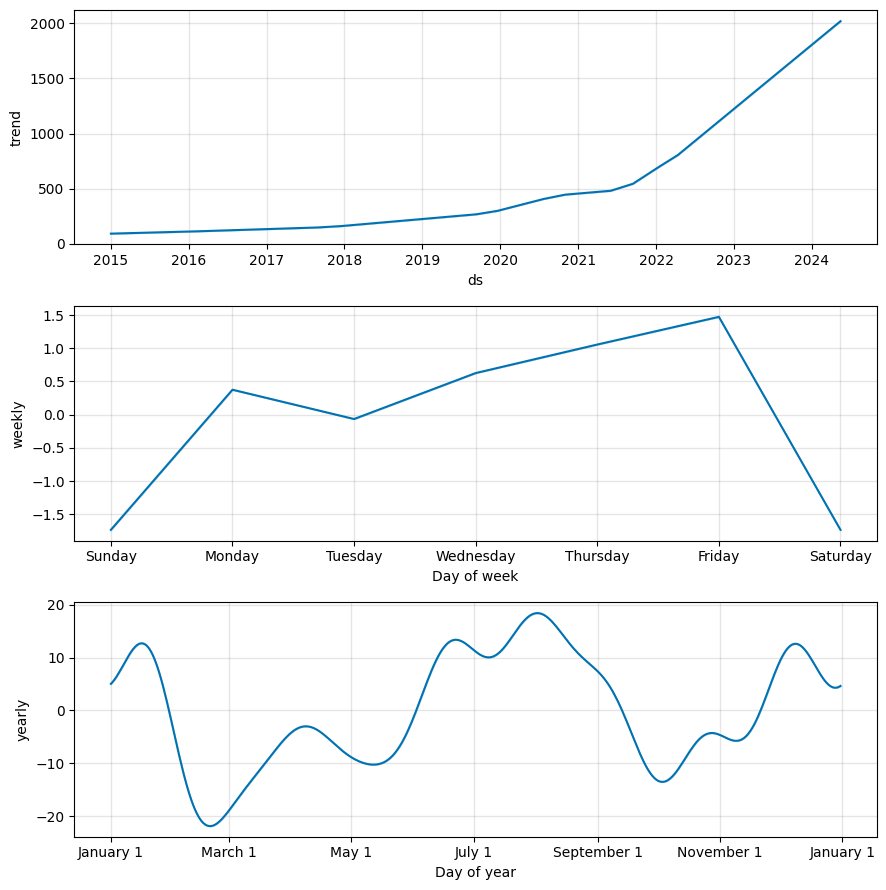

In [76]:
model.plot_components(tahmin)

In [77]:
df = yf.download("BTC-USD","2015-01-01","2024-02-06")
df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400


In [78]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-03,43184.964844,43359.941406,42890.808594,42992.250000,42992.250000,11169245236
2024-02-04,42994.941406,43097.644531,42374.832031,42583.582031,42583.582031,14802225490
2024-02-05,42577.621094,43494.250000,42264.816406,42658.667969,42658.667969,18715487317


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/alikny18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5jomphg7/kl8_eryx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=837', 'data', 'file=/tmp/tmp5jomphg7/alikny18.json', 'init=/tmp/tmp5jomphg7/kl8_eryx.json', 'output', 'file=/tmp/tmp5jomphg7/prophet_modeltx2d7whw/prophet_model-20240206181527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


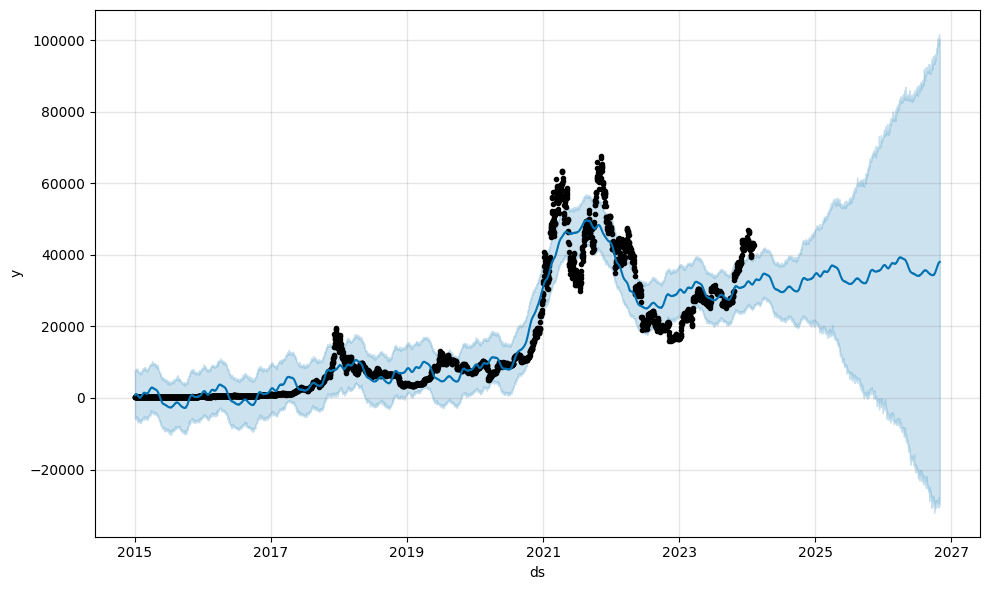

In [80]:
df = df.reset_index()
gelecek = df[["Date","Close"]]
gelecek.columns = ["ds","y"]
model = Prophet()
model.fit(gelecek)
future = model.make_future_dataframe(1000)
tahmin = model.predict(future)
model.plot(tahmin);
